<a href="https://colab.research.google.com/github/Zuhair0000/tensorflow_bootcamp/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2026-02-06 09:13:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   190MB/s    in 0.6s    

2026-02-06 09:13:32 (190 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Modren way

# with zipfile.ZipFile('pizza_steak.zip', 'r') as zip_ref:
#   zip_ref.extractall('extracted_data')
#   print("Unzipping complete")

# inspect The data

In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 0 images in 'pizza_steak.
There are 2 directories and 0 images in 'pizza_steak/train.
There are 0 directories and 750 images in 'pizza_steak/train/steak.
There are 0 directories and 750 images in 'pizza_steak/train/pizza.
There are 2 directories and 0 images in 'pizza_steak/test.
There are 0 directories and 250 images in 'pizza_steak/test/steak.
There are 0 directories and 250 images in 'pizza_steak/test/pizza.


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

# View random image from the training dataset

Image shape: (384, 512, 3)


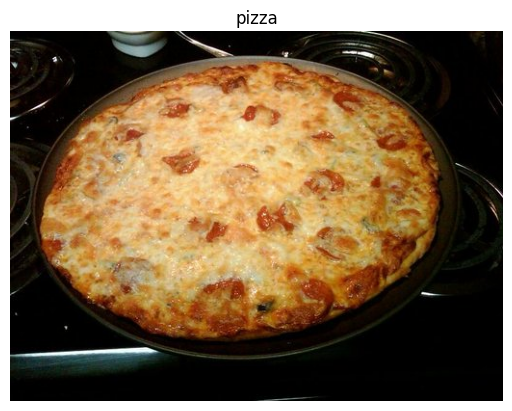

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [7]:
import tensorflow as tf
tf.constant(img)

NameError: name 'img' is not defined

# An end-to-end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3),
                           ),
    tf.keras.layers.Conv2D(10, 2, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(10, 2, activation='relu'),
    tf.keras.layers.Conv2D(10, 2, activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')

])


model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 221, 221, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 108, 108, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        29,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,015 (359.44 KB)

 Trainable params: 30,671 (119.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,344 (239.63 KB)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.5218 - loss: 3.1590 - val_accuracy: 0.7400 - val_loss: 0.8022
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.7206 - loss: 1.2321 - val_accuracy: 0.6880 - val_loss: 0.8750
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6609 - loss: 0.9567 - val_accuracy: 0.5100 - val_loss: 0.6793
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4934 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4881 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.5142 - loss: 6.6255 - val_accuracy: 0.5780 - val_loss: 2.2846
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.6714 - loss: 1.6927 - val_accuracy: 0.6240 - val_loss: 1.7653
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.7093 - loss: 1.0482 - val_accuracy: 0.5960 - val_loss: 1.4801
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.6813 - loss: 1.2406 - val_accuracy: 0.7800 - val_loss: 0.8066
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.7835 - loss: 0.6337 - val_accuracy: 0.6980 - val_loss: 0.9507


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

# Binary Classification

## 1. Become one with the data (Visualize)

Image shape: (384, 512, 3)
Image shape: (511, 512, 3)


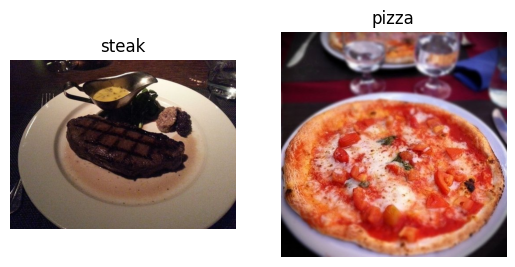

In [8]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

## 2. Preprocess the data

In [9]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

### Old Preprocessing method

In [10]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32,
#                                                image_size=(224, 224),
#                                                seed=42)

# test_data = test_datagen.flow_from_directory(test_dir,
#                                              batch_size=32,
#                                              image_size=(224, 224),
#                                              seed=42)

### Modern preprocessing method

In [11]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


## 3. Create CNN model

In [12]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           strides=(1, 1),
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5698 - loss: 4.4622 - val_accuracy: 0.8080 - val_loss: 0.4264
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.7859 - loss: 0.4683 - val_accuracy: 0.8040 - val_loss: 0.4082
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.8253 - loss: 0.4039 - val_accuracy: 0.8240 - val_loss: 0.4073
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 236ms/step - accuracy: 0.8463 - loss: 0.3652 - val_accuracy: 0.8200 - val_loss: 0.3740
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.9083 - loss: 0.2345 - val_accuracy: 0.8480 - val_loss: 0.3641


In [13]:
# Create the model with your current settings
model_valid = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, padding='valid'), # <--- VALID
    tf.keras.layers.Conv2D(32, 3, padding='valid')
])
print("--- VALID PADDING ---")
model_valid.summary()

# Create the model with modern settings
model_same = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, padding='same'), # <--- SAME
    tf.keras.layers.Conv2D(32, 3, padding='same')
])
print("\n--- SAME PADDING ---")
model_same.summary()

--- VALID PADDING ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)


--- SAME PADDING ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

<Axes: >

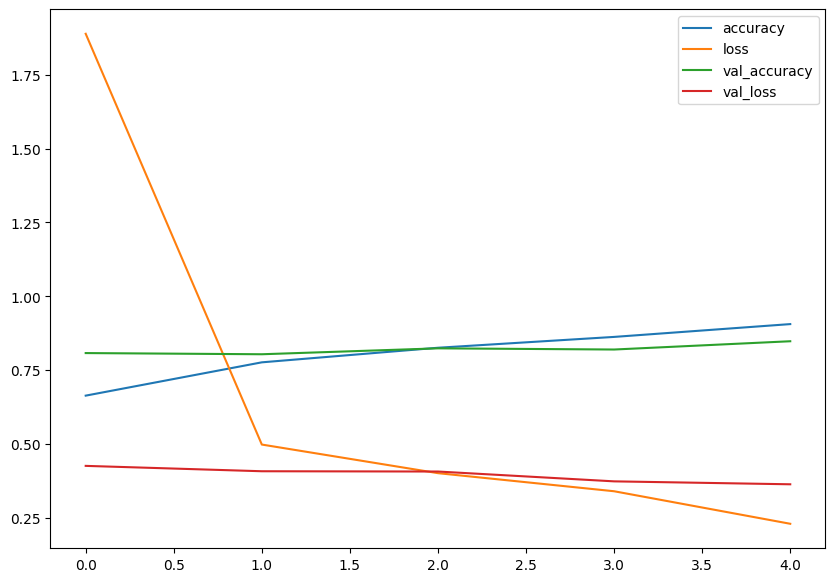

In [14]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [15]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

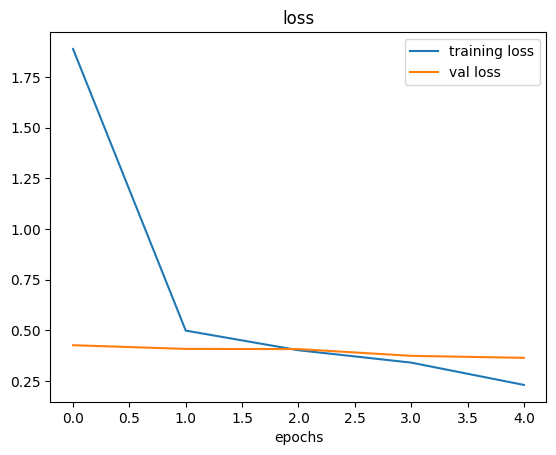

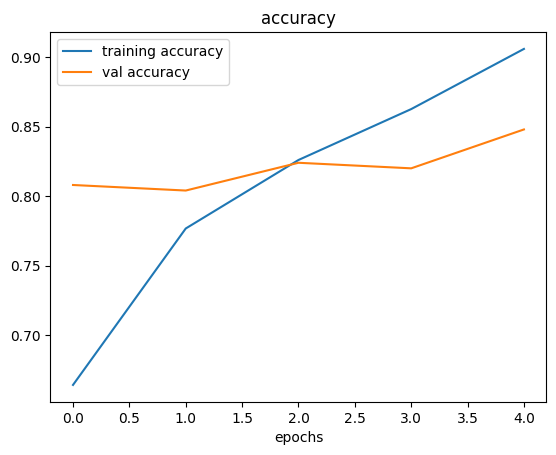

In [16]:
plot_loss_curves(history_4)

In [17]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           strides=(1, 1),
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.6496 - loss: 0.6341 - val_accuracy: 0.8140 - val_loss: 0.4075
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8301 - loss: 0.4106 - val_accuracy: 0.8480 - val_loss: 0.3571
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8243 - loss: 0.4021 - val_accuracy: 0.8520 - val_loss: 0.3416
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8418 - loss: 0.3802 - val_accuracy: 0.8680 - val_loss: 0.3288
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8638 - loss: 0.3535 - val_accuracy: 0.8940 - val_loss: 0.3022


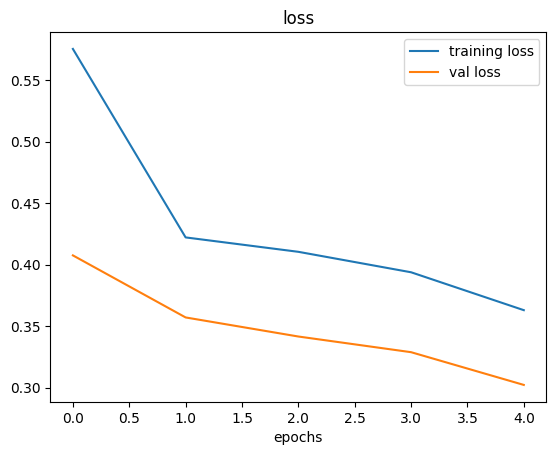

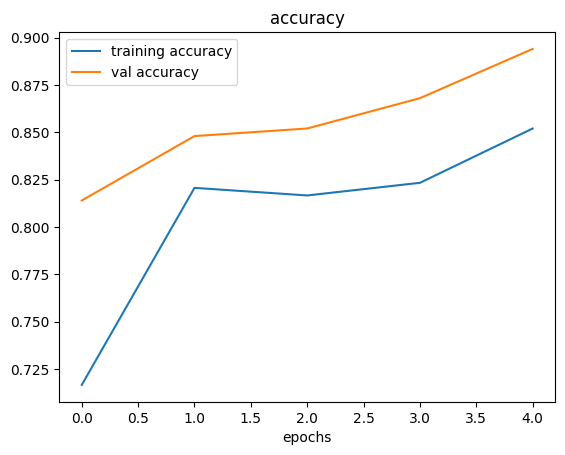

In [18]:
plot_loss_curves(history_5)

In [19]:
model_5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

# **Old way augmentation**

In [20]:
# Old way

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
#                                              rotation_range=0.2,
#                                              shear_range=0.2,
#                                              zoom_range=0.2,
#                                              width_shift_range=0.2,
#                                              height_shift_range=0.3,
#                                              horizontal_flip=False)


# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
# train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
#                                                                    target_size=(224, 224),
#                                                                    batch_size=32,
#                                                                    class_mode='binary',
#                                                                    shuffle=False)

# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode='binary',
#                                                shuffle=False)

# test_data = test_datagen.flow_from_directory(test_dir,
#                                              batch_size=32,
#                                              target_size=(224, 224),
#                                              class_mode='binary',
#                                              shuffle=False,
#                                              )

# **Modern way augmentation**

In [22]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         shuffle=True,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         shuffle=False,
                                                         seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [23]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomZoom(0.2),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_6 = model_6.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.6008 - loss: 0.6485 - val_accuracy: 0.7680 - val_loss: 0.4884
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7642 - loss: 0.4987 - val_accuracy: 0.8040 - val_loss: 0.4342
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7972 - loss: 0.4450 - val_accuracy: 0.8200 - val_loss: 0.3803
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7910 - loss: 0.4503 - val_accuracy: 0.8420 - val_loss: 0.3549
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8243 - loss: 0.4256 - val_accuracy: 0.8600 - val_loss: 0.3371


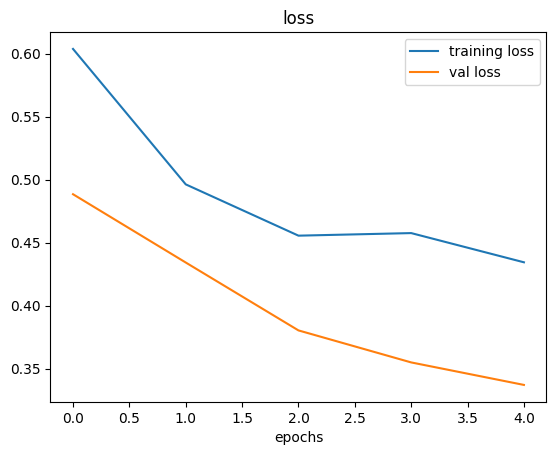

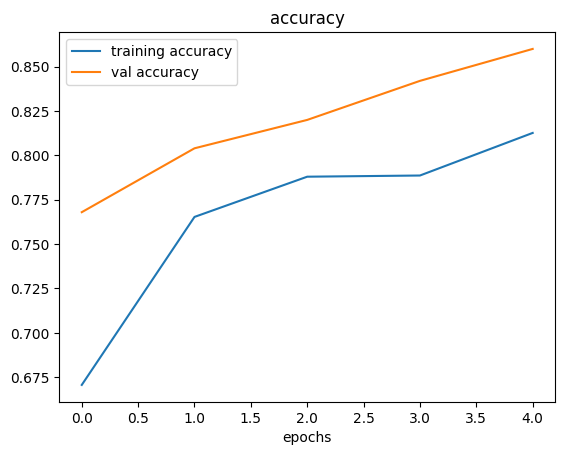

In [24]:
plot_loss_curves(history_6)

In [33]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2026-02-06 09:24:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-06 09:24:13 ERROR 404: Not Found.



In [34]:
steak = mpimg.imread('/content/03-steak.jpeg')

In [35]:
steak.shape

(4032, 3024, 3)

In [36]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [38]:
def load_and_prep_image(filename, image_shape=224):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, [image_shape, image_shape])

  img = img/255.
  return img

In [40]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [44]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.9794292]], dtype=float32)

In [45]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [47]:
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [51]:
def pred_and_plt(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


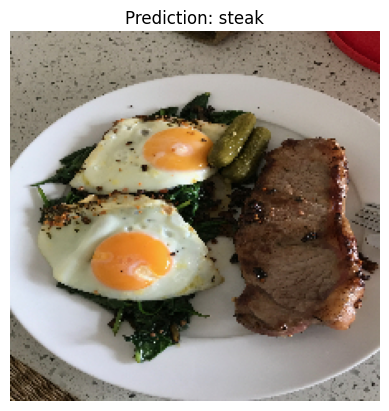

In [52]:
pred_and_plt(model_6, '03-steak.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


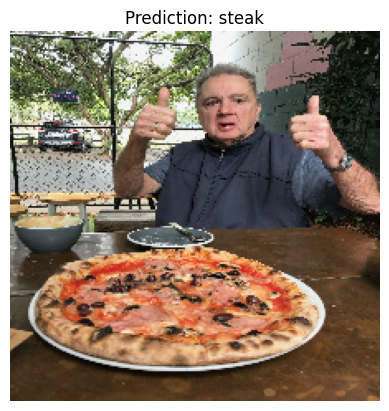

In [53]:
pred_and_plt(model_6, '03-pizza-dad.jpeg')